## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [8]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [9]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [10]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [11]:
# Agrupa os 2 Dataframes em um.
df_raw = pd.concat([X, y], axis=1)
df_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
# Shape
df_raw.shape

(506, 14)

In [13]:
# Info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
# Verificando e somando quantidade de valores ausentes
df_raw.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [16]:
X_a = df_raw.drop(columns = ['medv']).copy()
X_a.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [18]:
y_a = df_raw.loc[:,'medv']
y_a.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, random_state=2360873)

In [20]:
# Adicionei o min_samples_leaf = 10 para refinar a análise
regr_a = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
regr_a.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [21]:
# CCP para a base de treinamento
# Ele retorna esses dois objetos: ccp_alphas e impureza.
# A impureza nesse caso é o mse(mean square error)

path = regr_a.cost_complexity_pruning_path(X_train, y_train)

path

{'ccp_alphas': array([0.00000000e+00, 2.02849604e-02, 3.28161944e-02, 3.46226913e-02,
        5.99238888e-02, 9.33006812e-02, 1.07739666e-01, 1.15017661e-01,
        1.15206747e-01, 1.58906213e-01, 1.70190045e-01, 1.71920185e-01,
        3.06995609e-01, 4.00081328e-01, 4.47497801e-01, 5.02500496e-01,
        5.47321975e-01, 5.65970286e-01, 5.74680079e-01, 6.84263688e-01,
        6.98850746e-01, 1.19694341e+00, 2.78056299e+00, 4.52477476e+00,
        5.28170375e+00, 1.70606107e+01, 4.16718568e+01]),
 'impurities': array([11.1584514 , 11.17873636, 11.21155255, 11.24617524, 11.30609913,
        11.49270049, 11.60044016, 11.71545782, 11.94587131, 12.10477753,
        12.27496757, 12.61880794, 12.92580355, 13.32588488, 13.77338268,
        14.27588317, 14.82320515, 15.38917544, 15.96385551, 16.6481192 ,
        17.34696995, 18.54391335, 21.32447635, 25.84925111, 31.13095486,
        48.19156561, 89.86342242])}

Text(0, 0.5, 'Impureza total das folhas')

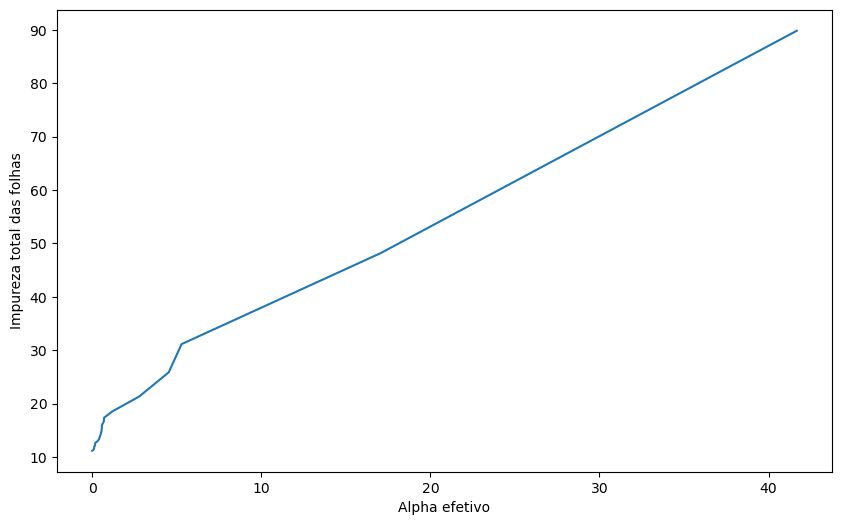

In [22]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas')

. Observamos no gráfico que a impureza começa pequena e vai aumentando

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [23]:
# Profundidade da árvore em função do alpha
# Vamos variar para cada CCP e vamos construir uma nova árvore, um novo regressor com o alpha que indicarmos
# Vamos treinar o modelo e guardar esse cara numa lista  
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)  

Text(0, 0.5, 'Profundidade de árvore')

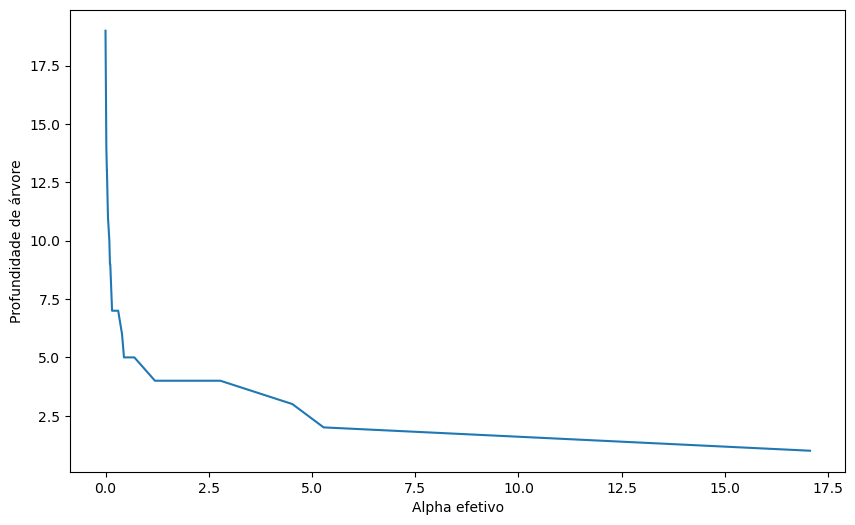

In [24]:
# Agora podemos tirar de cada uma dessas árvores a respectiva profundidade e plotar em função do alpha
tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas[ : -1], tree_depths[ : -1])
plt.xlabel('Alpha efetivo')
plt.ylabel('Profundidade de árvore')

Vemos no gráfico que conforme aumentamos o CCP ele vai penalizando mais ramos da árvore e vai deixando ela mais enxuta.

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [25]:
# MSE da base de treinamento e da base de teste.
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

n_minimo,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
profundidade,,,,,,,,,,,,,,,,,,
2,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035
3,0.607844,0.608277,0.596417,0.625875,0.634217,0.645757,0.645757,0.645757,0.645757,0.646825,0.647563,0.633841,0.633841,0.633841,0.633841,0.633841,0.633841,0.633841
4,0.692832,0.672232,0.676667,0.627247,0.682184,0.665746,0.658618,0.658618,0.658618,0.675995,0.672586,0.658864,0.658864,0.658864,0.658864,0.658864,0.656773,0.656773
5,0.746096,0.728635,0.728312,0.681329,0.738481,0.717710,0.710582,0.702706,0.702706,0.720175,0.720248,0.706526,0.703893,0.703893,0.703161,0.704923,0.704621,0.700095
6,0.743616,0.732195,0.731409,0.664891,0.731649,0.722235,0.717054,0.709117,0.707208,0.726767,0.723949,0.710372,0.710287,0.710532,0.705662,0.707847,0.707545,0.701806
7,0.744630,0.729167,0.726462,0.664906,0.740812,0.722963,0.718808,0.705538,0.710841,0.732575,0.727482,0.714202,0.711122,0.713465,0.708857,0.709954,0.709652,0.703913
8,0.754804,0.728973,0.728920,0.676645,0.734130,0.736544,0.722554,0.708404,0.714100,0.736191,0.730508,0.716231,0.713286,0.713465,0.708857,0.709954,0.709652,0.703913
9,0.738394,0.707178,0.719110,0.668468,0.729858,0.728856,0.721596,0.706656,0.713639,0.735729,0.730277,0.716231,0.713286,0.713465,0.708857,0.709954,0.709652,0.703913
10,0.644637,0.696955,0.704829,0.666896,0.737013,0.731207,0.721596,0.706656,0.713639,0.735729,0.730277,0.716231,0.713286,0.713465,0.708857,0.709954,0.709652,0.703913


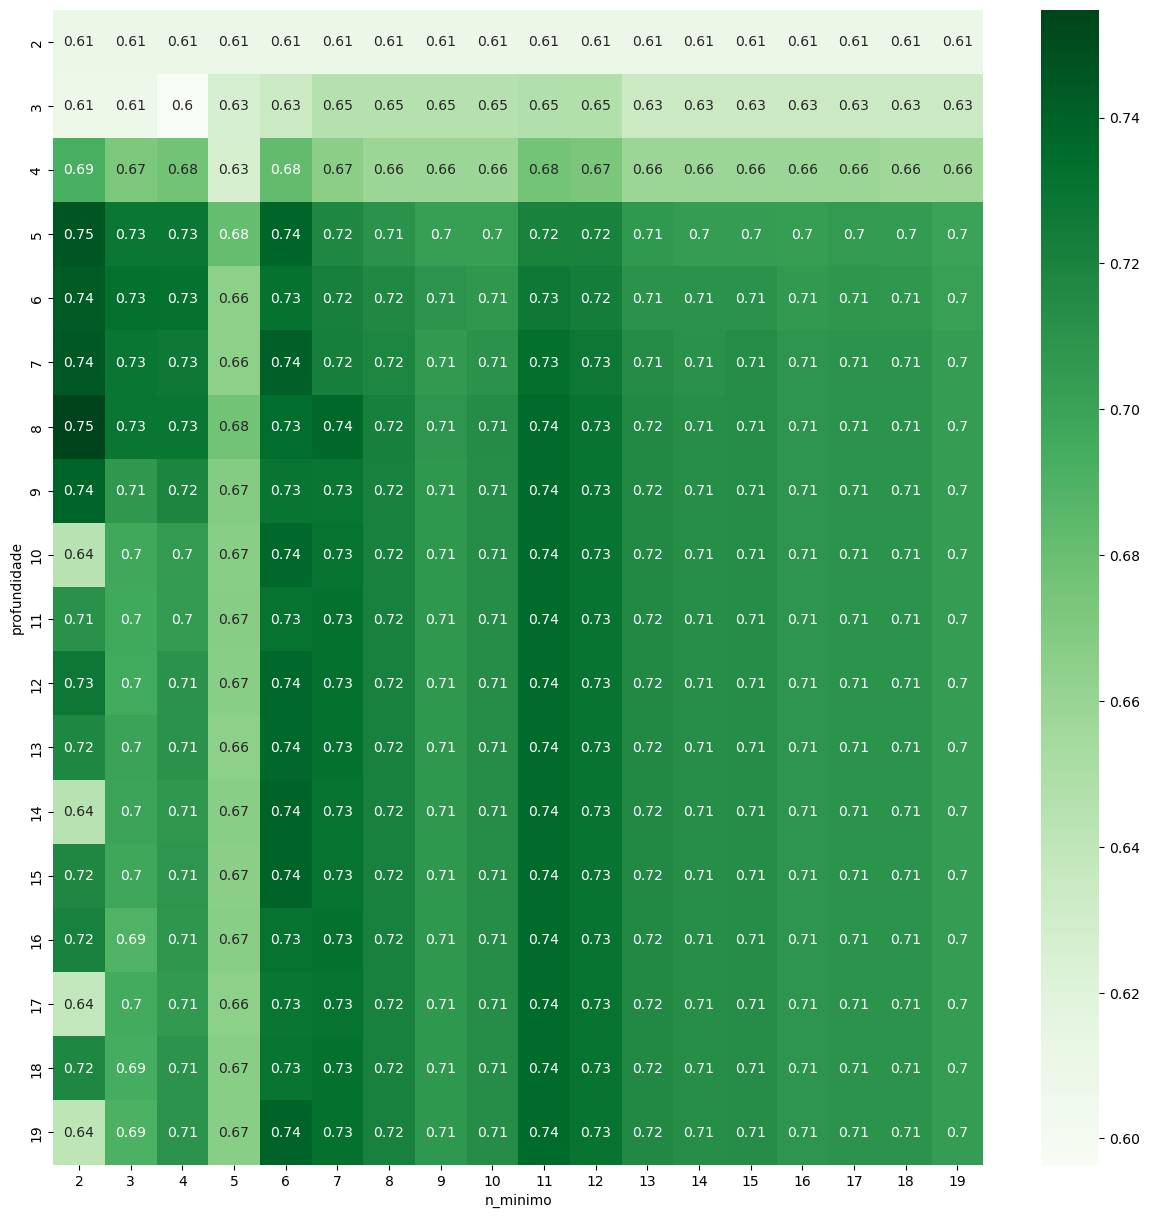

In [31]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 20):
    for j in range(2, 20):
        regr_1 = DecisionTreeRegressor(max_depth = i, min_samples_leaf = j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
        
plt.rc('figure', figsize = (15, 15))

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index = 'profundidade', columns = 'n_minimo', values = 'mses'), annot = True, cmap = 'Greens')
df_mse.pivot(index = 'profundidade', columns = 'n_minimo', values = 'mses')

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

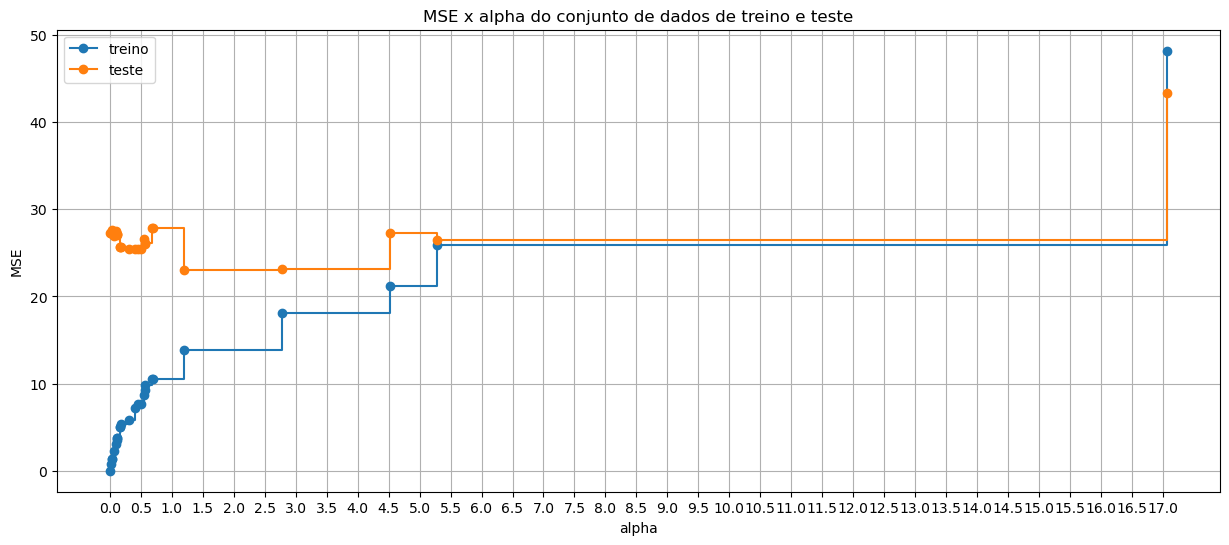

In [26]:
# MSE da árvore em função do alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
ax.grid()
plt.gcf().set_size_inches(15, 6)
plt.xticks(np.arange(0, 17.5, .5))
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [27]:
regr_a = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, ccp_alpha=0.5)

regr_a.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.5, max_depth=8, min_samples_leaf=10)

In [28]:
# R²
regr_a.score(X_train, y_train)

0.8467298227927114

### 7. Visualize esta árvore.

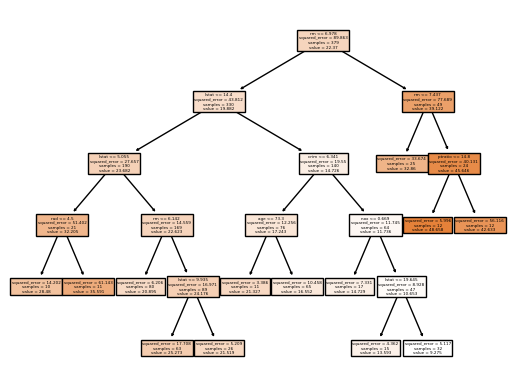

In [29]:
tp = tree.plot_tree(regr_a,
                   feature_names = X.columns,
                   filled = True)

In [30]:
# Outra forma de visualizar salvando a imagem em PNG
dot_data = tree.export_graphviz(regr_a, out_file=None, 
                                feature_names=X_a.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph.view()

'Source.gv.png'